<a href="https://colab.research.google.com/github/Gimmi-07/FFML_Capstone/blob/main/Capstone_02_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Convulation Neural Network**
##**What is Convulation Neural Network (CNNs) ?**
A Convolutional Neural Network (CNN) represents a sophisticated form of deep learning model primarily employed for tasks such as image recognition. Its core functionality revolves around learning to identify intricate patterns within images by employing specialized layers known as convolutional layers. These layers utilize filters to systematically analyze the input image, detecting essential features like edges, textures, and shapes.

As data progresses through successive layers, the CNN becomes adept at discerning increasingly complex patterns. Additionally, CNN architectures incorporate pooling layers, which serve to condense the data dimensionality, enhancing computational efficiency. Ultimately, fully connected layers situated towards the network's end utilize the acquired features to classify images into predefined categories.

CNNs are prized for their ability to autonomously and dynamically acquire spatial hierarchies of features from input images, making them exceptionally potent for a variety of visual recognition tasks

##1. Importing the Libraries

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F  # Ensure this line is present
import matplotlib.pyplot as plt
import numpy as np


##2. Loading and Preprocessing Data
We'll load and preprocess the FashionMNIST dataset.

Sample images with labels:
T-shirt/top T-shirt/top Trouser  Coat


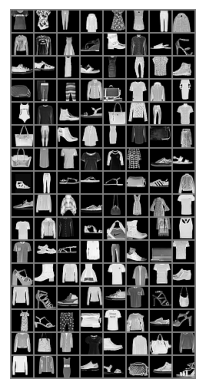

In [10]:
# Define transformation
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(28, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load training data
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

# Download and load test data
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False, num_workers=2)

# Define classes in FashionMNIST dataset
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.show()

# Print and show image samples
print("Sample images with labels:")
for batch_idx, (images, labels) in enumerate(trainloader):
    if batch_idx < 1:  # Print samples only from the first batch
        print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
        imshow(torchvision.utils.make_grid(images))


##3. Defining the CNN Model
We define a CNN model suitable for the FashionMNIST dataset.

In [11]:
class FashionMNISTCNN(nn.Module):
    def __init__(self):
        super(FashionMNISTCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.25))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25))
        self.fc1 = nn.Linear(128 * 2 * 2, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(self.fc2(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.fc3(x)
        return x

net = FashionMNISTCNN()


##4. Defining the Loss Function and Optimizer
We specify the loss function and use the Adam optimizer.

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)
print(criterion)
print(optimizer)


CrossEntropyLoss()
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


##5. Training the Model
We train the model on the training data.

In [13]:
for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')



Epoch 1, Batch 100, Loss: 1.403
Epoch 1, Batch 200, Loss: 0.873
Epoch 1, Batch 300, Loss: 0.782
Epoch 1, Batch 400, Loss: 0.723
Epoch 2, Batch 100, Loss: 0.660
Epoch 2, Batch 200, Loss: 0.647
Epoch 2, Batch 300, Loss: 0.603
Epoch 2, Batch 400, Loss: 0.610
Epoch 3, Batch 100, Loss: 0.588
Epoch 3, Batch 200, Loss: 0.575
Epoch 3, Batch 300, Loss: 0.560
Epoch 3, Batch 400, Loss: 0.550
Epoch 4, Batch 100, Loss: 0.534
Epoch 4, Batch 200, Loss: 0.532
Epoch 4, Batch 300, Loss: 0.534
Epoch 4, Batch 400, Loss: 0.499
Epoch 5, Batch 100, Loss: 0.494
Epoch 5, Batch 200, Loss: 0.504
Epoch 5, Batch 300, Loss: 0.502
Epoch 5, Batch 400, Loss: 0.477
Epoch 6, Batch 100, Loss: 0.496
Epoch 6, Batch 200, Loss: 0.464
Epoch 6, Batch 300, Loss: 0.460
Epoch 6, Batch 400, Loss: 0.463
Epoch 7, Batch 100, Loss: 0.460
Epoch 7, Batch 200, Loss: 0.451
Epoch 7, Batch 300, Loss: 0.453
Epoch 7, Batch 400, Loss: 0.458
Epoch 8, Batch 100, Loss: 0.452
Epoch 8, Batch 200, Loss: 0.447
Epoch 8, Batch 300, Loss: 0.427
Epoch 8,

##6. Evaluating the Model
We evaluate the model on the test data.

In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the network on the 10000 test images: 86.60%


##Concusion
This advanced CNN model improves performance and accuracy through data augmentation, deeper architecture, batch normalization, dropout regularization, and the efficient Adam optimizer, making it more robust and capable of achieving higher accuracy than simpler models.